<a href="https://colab.research.google.com/github/Livy-Li/COVID19_Research_Paper_Analysis/blob/main/Covid19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigation of Precautions to Prevent the Spread of Covid

The research question defined for this project is to use the open sourced research papers to investigate the difference of precaution measures used to prevent the spread of coronavirus between Pre-COVID19 and Post COVID-19 times


The abstracts of the research papers are separated into two groups based on their publishing times, the pre-COVID19 group and the post-COVID19 group. We then explore the two groups separately about 

1)what are the most used precaution meausures to prevent the spread of coronavirus

2)utilizing unsupervised clustering ML algorithm to group precaution measures, see how close they relate to each other

Finally we make comparisons between the results of the two groups, in order to gain more insights about whether covid-19 precautions are different from the precautions used in previous coronavirus cases.

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [ ]:
#read data
df = pd.read_csv('metadata.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 1.Data Cleaning

In [ ]:
#extract useful columns from the raw data
df = df[['abstract','publish_time']]

#drop duplicates and drop rows containing nan
df = df.drop_duplicates(subset='abstract', keep="first")
df = df.dropna()

#turn the abstract string into all lower case and strip any signs
#for easier text mining
df["abstract"] = df["abstract"].str.lower()
df["abstract"] = df["abstract"].apply(lambda x: ' '.join(re.sub(r"[^a-zA-Z0-9\s]"," ",x).split()))
df.head()

,abstract,publish_time
0,objective this retrospective chart review desc...,2001-07-04
1,inflammatory diseases of the respiratory tract...,2000-08-15
2,surfactant protein d sp d participates in the ...,2000-08-25
3,endothelin 1 et 1 is a 21 amino acid peptide w...,2001-02-22
4,respiratory syncytial virus rsv and pneumonia ...,2001-05-11


In [ ]:
pre_covid19_abstract = df.loc[df['publish_time']<'2020']['abstract']
post_covid19_abstract = df.loc[df['publish_time']>='2020']['abstract']

## 2.Data Visualization and Exploratory Data Analysis

First, we need to identify the general precautions that were used in preventing the spread of coronavirus. These precautions are grouped in to 6 categories listed below:

1) Wearing facemask

2) wash hands and keep general sanitization

3) social distancing

4) lockdown / stay at home order

5) close school and non-essential business

6) travel restrictions

Each of the category might have one or more keywords related to them, by counting the number of abstracts containing these keywords, we can get an impression of which ones are the most talked about in the academic papers for both pre and post COVID19 periods

NOTE: some of the keywords might be stemmed, in order to catch the same word in different forms. For example: the keyword "sanitiz" is used to find all of the words in the same family "sanitize", "sanitizing","sanitized","sanitizes" etc.

In [ ]:
#identify keywords for each precaution category
precaution_mask = ['mask', 'facemask']
precaution_hygiene = ['handwash','wash hand','hand wash','sanitiz','hand hygiene','disinfec']
precaution_distancing = ['social distanc','reduce contact','contact restric']
precaution_lockdown = ['quarantin','lock down','lockdown','stay at home','work from home']
precaution_closure = ['close school','school clos','business clos','non essential business']
precaution_notravel = ['border control','travel ban','reduce travel','travel control','travel restric']

In [ ]:
#count the number of abstracts containing keywords from each of the precaution category for pre-COVID19 papers
pre_precaution_count = {"mask":0,"hygiene":0,"distancing":0,
                        "lockdown":0,"closure":0,"no_travel":0}

pre_no_keywords = 0
for abstract in pre_covid19_abstract:
    counter = 0
    if any(word in abstract for word in precaution_mask):
        pre_precaution_count['mask']+=1
        counter+=1
    if any(word in abstract for word in precaution_hygiene):
        pre_precaution_count['hygiene']+=1
        counter+=1
    if any(word in abstract for word in precaution_distancing):
        pre_precaution_count['distancing']+=1
        counter+=1
    if any(word in abstract for word in precaution_lockdown):
        pre_precaution_count['lockdown']+=1
        counter+=1
    if any(word in abstract for word in precaution_closure):
        pre_precaution_count['closure']+=1
        counter+=1
    if any(word in abstract for word in precaution_notravel):
        pre_precaution_count['no_travel']+=1
        counter+=1
    if counter == 0:
        pre_no_keywords += 1

print(pre_precaution_count)
print(f"\nThe total number of abstract of pre-COVID19 period is {pre_covid19_abstract.shape[0]}")
print(f"The number of abstracts that contain keywords is {pre_covid19_abstract.shape[0]-pre_no_keywords}")

{'mask': 690, 'hygiene': 645, 'distancing': 90, 'lockdown': 433, 'closure': 40, 'no_travel': 61}

The total number of abstract of pre-COVID19 period is 79546
The number of abstracts that contain keywords is 1743


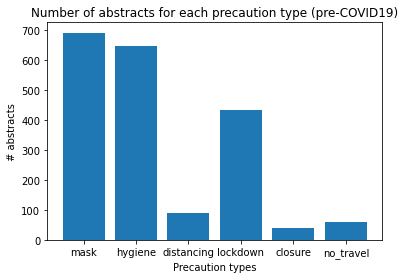

In [ ]:
#graph the number of abstracts containing keywords from each of the precaution category for pre-COVID19 papers
plt.bar(pre_precaution_count.keys(), pre_precaution_count.values())
    
plt.xlabel('Precaution types')
plt.ylabel('# abstracts')
plt.title('Number of abstracts for each precaution type (pre-COVID19)')
plt.show()

In [ ]:
#count the number of abstracts containing keywords from each of the precaution category for post-COVID19 papers
post_precaution_count = {"mask":0,"hygiene":0,"distancing":0,
                        "lockdown":0,"closure":0,"no_travel":0}

post_no_keywords = 0
for abstract in post_covid19_abstract:
    counter = 0
    if any(word in abstract for word in precaution_mask):
            post_precaution_count['mask']+=1
            counter+=1
    if any(word in abstract for word in precaution_hygiene):
            post_precaution_count['hygiene']+=1
            counter+=1
    if any(word in abstract for word in precaution_distancing):
            post_precaution_count['distancing']+=1
            counter+=1
    if any(word in abstract for word in precaution_lockdown):
            post_precaution_count['lockdown']+=1
            counter+=1
    if any(word in abstract for word in precaution_closure):
            post_precaution_count['closure']+=1
            counter+=1
    if any(word in abstract for word in precaution_notravel):
            post_precaution_count['no_travel']+=1
            counter+=1
    if counter == 0:
        post_no_keywords += 1

print(post_precaution_count)
print(f"\nThe total number of abstract of post-COVID19 period is {post_covid19_abstract.shape[0]}")
print(f"The number of abstracts that contain keywords is {post_covid19_abstract.shape[0]-post_no_keywords}")

{'mask': 6330, 'hygiene': 3937, 'distancing': 8649, 'lockdown': 19283, 'closure': 883, 'no_travel': 950}

The total number of abstract of post-COVID19 period is 244150
The number of abstracts that contain keywords is 32384


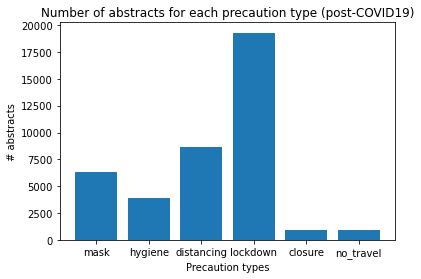

In [ ]:
#graph the number of abstracts containing keywords from each of the precaution category for post-COVID19 papers
plt.bar(post_precaution_count.keys(), post_precaution_count.values())
    
plt.xlabel('Precaution types')
plt.ylabel('# abstracts')
plt.title('Number of abstracts for each precaution type (post-COVID19)')
plt.show()

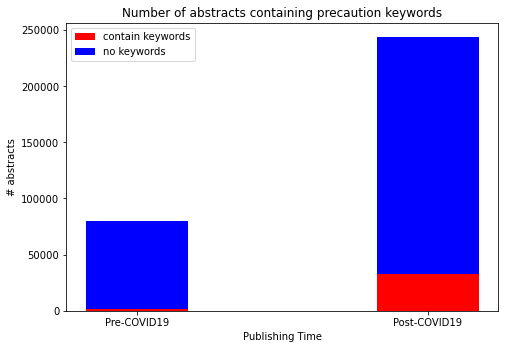

Percentage of abstracts containing precaution keywords
Pre-COVID19: 2.19%
Post-COVID19: 13.26%


In [ ]:
# graph the total number of abstracts that contain keywords and not contain keywords for each periods
contain_keywords = [pre_covid19_abstract.shape[0]-pre_no_keywords,post_covid19_abstract.shape[0]-post_no_keywords]
no_keywords = [pre_no_keywords,post_no_keywords]


N = 2
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(ind, contain_keywords, width, color='r')
ax.bar(ind, no_keywords, width,bottom=contain_keywords, color='b')

ax.set_ylabel('# abstracts')
ax.set_xlabel('Publishing Time')
ax.set_title('Number of abstracts containing precaution keywords')
ax.set_xticks(ind)
ax.set_xticklabels(('Pre-COVID19', 'Post-COVID19'))
ax.legend(labels=['contain keywords', 'no keywords'])
plt.show()

print("Percentage of abstracts containing precaution keywords")
print(f"Pre-COVID19: {round(((pre_covid19_abstract.shape[0]-pre_no_keywords)/pre_covid19_abstract.shape[0]*100),2 )}%")
print(f"Post-COVID19: {round(((post_covid19_abstract.shape[0]-post_no_keywords)/post_covid19_abstract.shape[0]*100),2 )}%")

From the graph above we can see that the for post-COVID19 papers, a larger percentage of them contain precaution keywords than pre-COVID19 papers.

There are also lot more papers post-COVID19 than pre-COVID19, therefore, it is not meaningful to compare the number of abstracts for each precaution category, we can instead compare the percentage of abstract for each category.

The percentage of abstract is calculated by using the number of abstracts for each of the category devide the number of total abstracts containing precaution keywords

Then we can compare the percentage of abstract for each of the precaution category, and see if there is any change from the pre-COVID19 period to the post-COVID19 period.

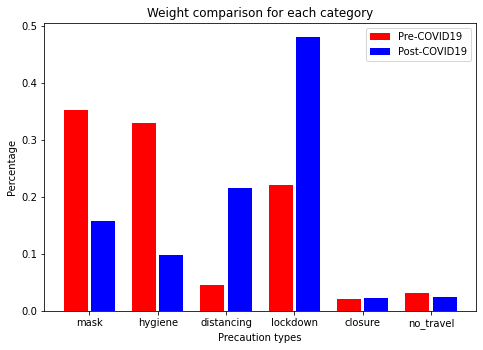

In [ ]:
#since the total number of pre and post COVID19 papers are not on the same magnitude
#we need to compare percentages
#calculate the percentage for each of the precaution category using their respective number devide by the total number
#compare the results between pre and post covid19 period 
#to see which precautions are the most discussed for both periods

pre_precaution_percentage = [pre_precaution_count['mask']/sum(pre_precaution_count.values()),
                             pre_precaution_count['hygiene']/sum(pre_precaution_count.values()),
                             pre_precaution_count['distancing']/sum(pre_precaution_count.values()),
                             pre_precaution_count['lockdown']/sum(pre_precaution_count.values()),
                             pre_precaution_count['closure']/sum(pre_precaution_count.values()),
                             pre_precaution_count['no_travel']/sum(pre_precaution_count.values())]
post_precaution_percentage = [post_precaution_count['mask']/sum(post_precaution_count.values()),
                             post_precaution_count['hygiene']/sum(post_precaution_count.values()),
                             post_precaution_count['distancing']/sum(post_precaution_count.values()),
                             post_precaution_count['lockdown']/sum(post_precaution_count.values()),
                             post_precaution_count['closure']/sum(post_precaution_count.values()),
                             post_precaution_count['no_travel']/sum(post_precaution_count.values())]

N = 6
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(ind, pre_precaution_percentage, width, color='r')
ax.bar(ind + 0.4, post_precaution_percentage, width, color='b')

ax.set_ylabel('Percentage')
ax.set_xlabel('Precaution types')
ax.set_title('Weight comparison for each category')
ax.set_xticks(ind+0.2)
ax.set_xticklabels(('mask', 'hygiene', 'distancing', "lockdown", 'closure','no_travel'))
ax.legend(labels=['Pre-COVID19', 'Post-COVID19'])
plt.show()

The figure above shows that for pre-COVID19 papers, the most mentioned precautions are 1)wearing facemask and 2)wash hands and keep general sanitization. for post-COVID19 papers, the most mentioned precautions are 1)lockdown / stay at home order and 2)social distancing. Especially for lockdown, there is a clear increasing discussion in post-COVID19 era.

## 3.Model selection and fitting to data

The model selected is an unsupervised clustering method called **Hierarchical clustering**.

It is chosen because it can effective group similar elements based on the distances between pairs. It is suitable to this research question because it is helpful to know which precautions are appearing together often in the papers for pre-COVID19 and post COVID19 periods. 

To use hierarchical clustering, we must define a distance matrix for all precaution types. By definition, the distance matrix defines the distances between any pair of elements, the distance between element A and itself is therefore 0. Since We are trying to determine which precautions are mentioned together (in the same abstract) most often, the logic for the distance matrix is that if two precautions are mentioned together often, the distance between them are smaller than another two precautions that are mentioned less often together.

In [ ]:
#The precautions and their keywords put input lists
precautions = ['mask', 'hygiene', 'distancing', "lockdown", 'closure','no_travel']
precautions_list = [precaution_mask,precaution_hygiene,precaution_distancing,
                    precaution_lockdown,precaution_closure,precaution_notravel]

In [ ]:
#Helper function that will calculate the distance

"""Implementation: If any keywords of precation A is mentioned in the same paper with any keywords in precaution B,
the distance between A and B reduces by 1. If they are not mentioned together, the distance increases by 1.
The total distance between is devided by the number of papers containing any keywords from A or B,
to minimize the effect different total number of abstracts containing any pair of keywords"""

def cumulative_dist(precaution1, precaution2, abstracts):
    cum_sum = 0
    number_of_papers = 0
    if precaution1 == precaution2: return 0
    
    for abstract in abstracts:
        if any(word in abstract for word in precaution1) and any(word in abstract for word in precaution2):
            number_of_papers += 1
            cum_sum -= 1
        elif ((any(word in abstract for word in precaution1) and all(word not in abstract for word in precaution2)) or (all(word not in abstract for word in precaution1) and any(word in abstract for word in precaution2))):
            number_of_papers += 1
            cum_sum += 1
    return cum_sum/number_of_papers


#Populate Matrix of precaution distances for both pre-COVID papers and post-COVID papers


pre_precaution_dist = np.zeros((len(precautions),len(precautions)),float)
post_precaution_dist = np.zeros((len(precautions),len(precautions)),float)

for i in range(len(precautions)):
    for j in range(len(precautions)):
        pre_precaution_dist[i][j] = cumulative_dist(precautions_list[i],precautions_list[j], pre_covid19_abstract)**10
        post_precaution_dist[i][j] = cumulative_dist(precautions_list[i],precautions_list[j], post_covid19_abstract)**10

In [ ]:
df_pre_precaution = pd.DataFrame(pre_precaution_dist, columns=precautions, index=precautions)
df_post_precaution = pd.DataFrame(post_precaution_dist, columns=precautions, index=precautions)

In [ ]:
print("Precaution distance matrix for Pre-COVID19 papers")   
df_pre_precaution

Precaution distance matrix for Pre-COVID19 papers


,mask,hygiene,distancing,lockdown,closure,no_travel
mask,0.000000,0.153798,0.599151,0.665084,0.946394,0.826988
hygiene,0.153798,0.000000,0.512793,0.590098,0.971142,0.917856
distancing,0.599151,0.512793,0.000000,0.363714,0.434388,0.761759
lockdown,0.665084,0.590098,0.363714,0.000000,0.737098,0.573671
closure,0.946394,0.971142,0.434388,0.737098,0.000000,0.422846
no_travel,0.826988,0.917856,0.761759,0.573671,0.422846,0.000000


In [ ]:
print("Precaution distance matrix for Post-COVID19 papers")   
df_post_precaution

Precaution distance matrix for Post-COVID19 papers


,mask,hygiene,distancing,lockdown,closure,no_travel
mask,0.000000,0.031307,0.155005,0.487099,0.858981,0.872446
hygiene,0.031307,0.000000,0.239879,0.617413,0.892879,0.967686
distancing,0.155005,0.239879,0.000000,0.063061,0.558853,0.634215
lockdown,0.487099,0.617413,0.063061,0.000000,0.688321,0.611602
closure,0.858981,0.892879,0.558853,0.688321,0.000000,0.521517
no_travel,0.872446,0.967686,0.634215,0.611602,0.521517,0.000000


In [ ]:
import scipy.cluster.hierarchy as sch

<ipython-input-161-04c0064a702a>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  pre_Y = sch.linkage(pre_precaution_dist, method='centroid')


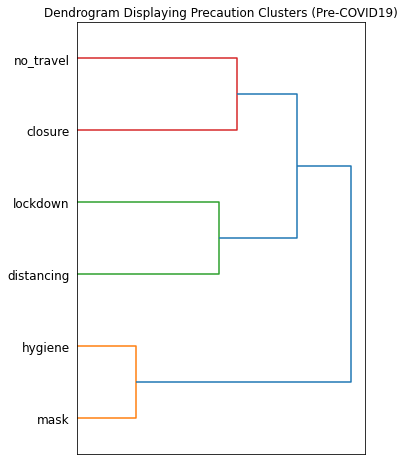

In [ ]:
# Distance was magnified prior to Hierarchical Clustering
pre_Y = sch.linkage(pre_precaution_dist, method='centroid')

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])

# Get the dendrogram
pre_Z = sch.dendrogram(pre_Y, orientation='right')

ax1.set_xticks([])
labels = df_pre_precaution.columns[pre_Z['leaves']]
ax1.set_yticklabels(labels)
ax1.set_title("Dendrogram Displaying Precaution Clusters (Pre-COVID19)")
plt.show()

<ipython-input-160-beca3f157be5>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  post_Y = sch.linkage(post_precaution_dist, method='centroid')


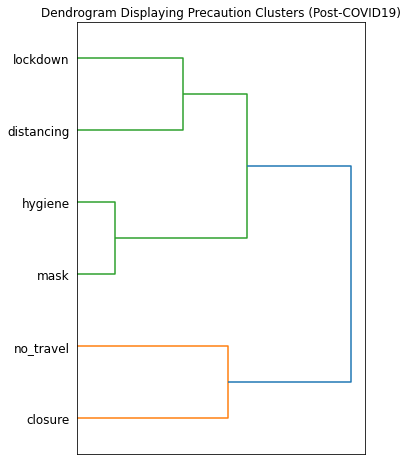

In [ ]:
# Distance was magnified prior to Hierarchical Clustering
post_Y = sch.linkage(post_precaution_dist, method='centroid')

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])

# Get the dendrogram
post_Z = sch.dendrogram(post_Y, orientation='right')
ax1.set_xticks([])
labels = df_post_precaution.columns[post_Z['leaves']]
ax1.set_yticklabels(labels)
ax1.set_title("Dendrogram Displaying Precaution Clusters (Post-COVID19)")
plt.show()

##4.Insights from the Analysis

**1. Precaution measures are especially important for battling COVID-19**

There is a significant increase in discussion about precaution measures in the post-COVID19 papers, this can be an indication that they are especially important in this battle against COVID19. Since  the scale of the pandemic is unprecedented, it takes effort from everyone to perform these precautions to protect themselves and others.

**2. The most cost-effective precaution measures are wearing masks and keep general sanitization**

For both pre-COVID19 and post-COVID19 papers, the most closely related precautions are mask and general sanitization, they are also the most mentioned precautions before COVID-19. They are useful and simple tactics against spread of germs, and are less controversial than the other more drastic precaution measures

**3. Lockdown and social distancing are being debated and normalized**

There are a lot more discussion involving lockdown and social distancing rules in the post-COVID19 papers. Partly because they have never been implemented in a global scale, and it has brought heated discussion about their impacts. The post-COVID19 papers mention them in parallel to the more traditional precaution measures, showing that they are being normalized in the current environment. 

**4. Travel restrictions and closing businesses are less impactful**

The discussion around travel restrictions and business/school shutdowns were relatively low for both pre-COVID19 and post-COVID19 papers. Even though these precautions also used more extensively around the world than before COVID-19 time. This may be partly due to the limitation of the dataset since it is more closely related with the field of medicine and biology instead of social science, but it could also be an indication that these  measures are less impactful because countries cannot afford to implement these precaution measures in the long run.

